
K-Means Customer Segmentation Analysis


In [1]:
import numpy as np
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


1.อ่านไฟล์

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


2.แสดงผล 10 บรรทัดแรก

In [3]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


3.ตรวจสอบ missing values,หาค่าสถิติพื้นฐาน

In [21]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
data[data.isnull().any(axis=1)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


In [5]:
print(data.describe)

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


4.ดูการแจกแจง โดยแสดงกราฟแท่งของลูกค้าแยกตามเพศ มีตัวอย่างคำสั่งในการ plot หลายรูปแบบ

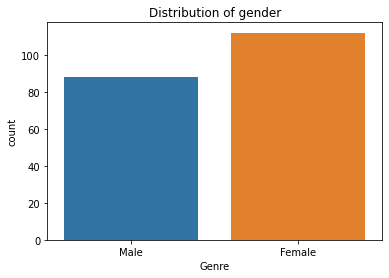

In [6]:
fig = sns.countplot(x='Genre',data=data);
plt.title('Distribution of gender');

5.สร้าง histogram,pie ของอายุ แบ่งเป็น 10 bin

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

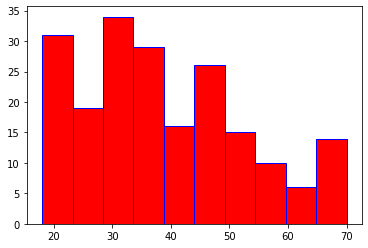

In [16]:
plt.hist(data['Age'],bins=10 ,color = "red", edgecolor ="blue")

6.ทำ scatter plot,pie ของข้อมูล Age, Income ทั้งแบบแยกและไม่แยกตามเพศ

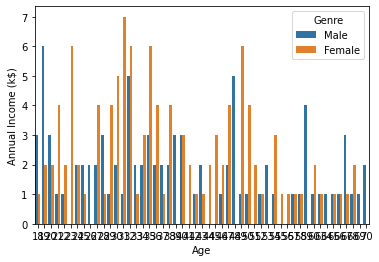

In [31]:
ax = sns.barplot(x='Age',y ='Annual Income (k$)', hue='Genre',  data=data, estimator=len)

In [15]:
#data.groupby(['Age'])['Annual Income (k$)'].count().plot(kind='pie', x='title col1', y='title col2')

7.พิจารณาค่า K ที่ดีที่สุดเพื่อนำไปทำ K-Mean clustering

In [10]:
X1 = data[['Age' , 'Annual Income (k$)']]
X1.shape

(200, 2)

8.ได้ค่า k= ? ในการจัดกลุ่มโดยวิธี K-Means

C:\Users\user\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 176108.77999999997
2 87121.56591478697
3 59492.737994932715
4 39529.8879673635
5 31651.380885243794
6 25416.40245864744
7 22012.763871014577
8 18910.53728272315
9 16017.581248575983


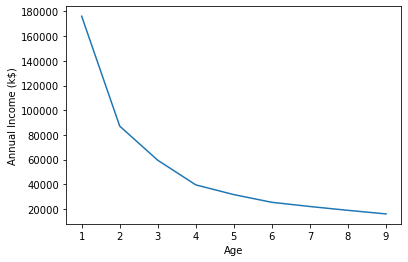

In [11]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print(k,sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

9.ทำ scatter plot ที่แสดง centroid

In [23]:
k_means = KMeans(n_clusters=4, init='random', max_iter=300)
k_means.fit(X1)  # fit model

KMeans(init='random', n_clusters=4)

In [24]:

# Predict the cluster for all the samples
cluster = k_means.predict(X1)
cluster_label = k_means.labels_

[[ 29.85416667  29.29166667]
 [ 55.78181818  51.34545455]
 [ 39.         106.5       ]
 [ 31.95890411  72.95890411]]


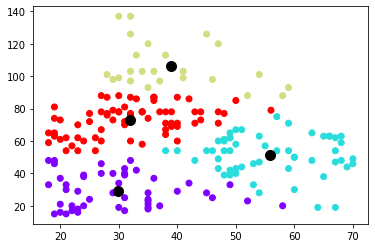

In [29]:

plt.scatter(data['Age'],data['Annual Income (k$)'], c=cluster_label, marker="o",cmap='rainbow')
centers = k_means.cluster_centers_
print(centers) #พิมพ์จุดกลาง
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)